<a href="https://colab.research.google.com/github/kretchmar/CS339_2023/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron
by Matt Kretchmar <p>
February 2023 <p>

This notebook implements the basic perceptron learning rule on a very simple 2D dataset.   


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg


### Dataset
Make a simple 2D dataset

[[-0.37589351  1.17633783]
 [ 1.23572614 -0.20244307]
 [ 0.0446754   0.65039119]
 [ 0.96411124 -0.48030544]
 [ 1.23078548  1.60375159]
 [ 0.01965121 -1.55277534]
 [ 1.28834389 -0.74807964]
 [-0.08137565 -0.6662521 ]
 [ 1.11560096 -1.62563418]
 [ 1.91160947  0.46570808]
 [-1.94606394  1.44411355]
 [-0.84666647  1.58123189]
 [ 1.45718188 -1.19868372]
 [ 1.00823957 -0.58699115]
 [-1.8102716   0.99936139]]
t = [-1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1.]


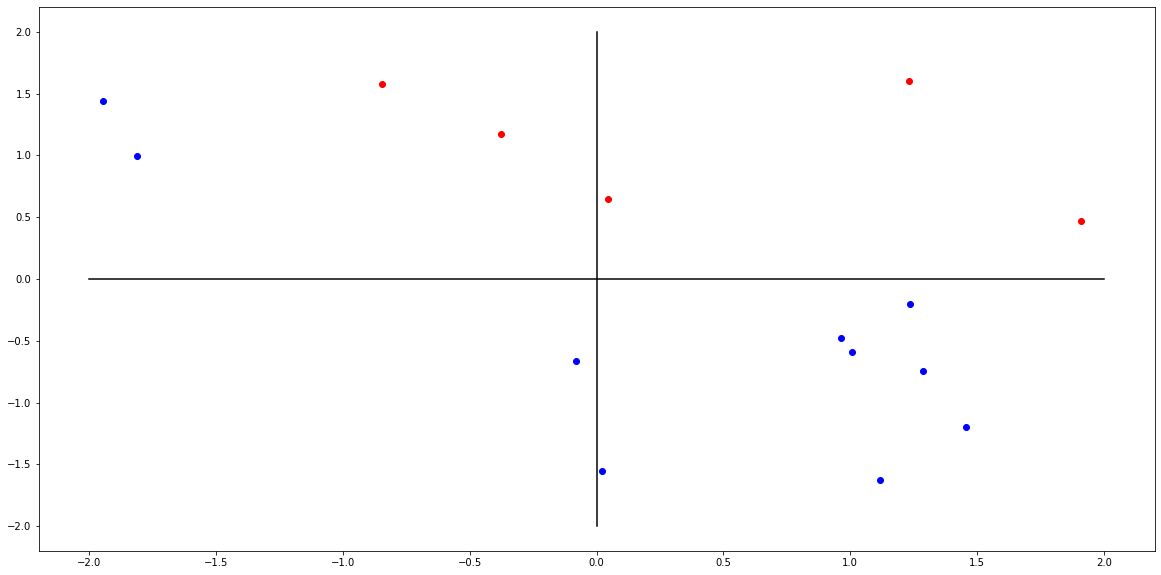

In [69]:
n = 15
x = np.random.uniform(low=-2,high=+2,size=(n,2))
print(x)

t = np.zeros(n)
for i in range(n):
  if x[i,1] > -0.5*x[i,0] + 0.5:
    t[i] = -1
  else:
    t[i] = +1

print('t =',t)
pos_x_indices = np.argwhere(t>0)
neg_x_indices = np.argwhere(t<0)

xp = x[pos_x_indices]
plt.figure(0,figsize=(20,10))
plt.scatter(x[pos_x_indices,0],x[pos_x_indices,1],c='blue')
plt.scatter(x[neg_x_indices,0],x[neg_x_indices,1],c='red')
plt.plot([0,0],[-2,+2],c='black')
plt.plot([-2,+2],[0,0],c='black')
plt.show()



## Basic Functions
These are the basic functions to implement the perceptron code. 

In [63]:
def sign (x):
  '''
  sign function
  '''
  if x > 0:
    return 1
  elif x < 0:
    return -1
  else:
    return 0

def sigmoid (x):
  '''
  sigmoid function
  '''
  return 1 / (1 + np.exp(-x))

def tanh (x):
  '''
  hyperbolic tangent function
  '''
  return np.tanh(-x)

def predict (x,w):
  '''
  x is a single data point with dimension d
  w is a weight vector with dimension d+1
  returns the prediction of x based on w
  '''
  # prepend a -1 to the data sample
  x = np.insert(x,0,-1,axis=0)
  sum = np.dot(w,x.transpose())
  return sign(sum)

def initWeights (d):
  '''
  If data lies in d-dimensional space, we need to create a
  d+1 dimensional weight vector (extra term for bias unit)
  All weights are generated by sampling from gausian 
  normal distribution of mean=0, mu=1.
  '''
  return np.random.normal(loc=0,scale=1,size=(d+1))
  
def fitOne (w,x,t,alpha):
  '''
  Fit one data point
  INPUTS:
  w - current d+1 dim weight vector
  x - d dimensional input sample
  t - desired target value (single value)
  alpha = learning rate
  RETURN VALUE:
  w - new value for weights
  '''
  y = predict(x,w)
  xp = np.insert(x,0,-1,axis=0)
  dw = xp * (t-y) * alpha
  w = w + dw
  return w

def fit (w,x,t,alpha):
  '''
  Fit data points
  INPUTS:
  w - current d+1 dim weight vector
  x - nxd dimensional input (n samples, each d dimensions)
  t - desired target value (d dimensions)
  alpha = learning rate
  RETURN VALUE:
  w - new value for weights
  '''
  for i in range(len(t)):
    xp = x[i]
    tp = t[i]
    w = fitOne(w,xp,tp,alpha)

  return w





## Graphing Functions
These functions help us visualize the performance and decision boundary of the perceptron

In [57]:
def plotDecisionGrid (w):
  z = np.linspace(-2,2,20)
  plt.plot([0,0],[-2,+2],c='black')
  plt.plot([-2,+2],[0,0],c='black')
  for i in range(20):
    for j in range(20):
      x = np.array((z[i],z[j]))
      y = predict(x,w)
      if y > 0:
        plt.scatter(x[0],x[1],c='blue',s=3)
      else:
        plt.scatter(x[0],x[1],c='red',s=3)

def plotDataResults (w,x,t):
  n = len(t)
  y = np.zeros(n)
  for i in range(n):
    xp = x[i]
    y = predict(xp,w)
    if t[i] > 0:
      color = 'blue'
    else:
      color = 'red'
    if y == t[i]:
      marker = 'o'
    else:
      marker = 'x'
    plt.scatter(xp[0],xp[1],c=color,marker=marker,s=30)



## Init Weights
Create an intial set of weights

In [76]:
#w = [-1,-1,-2]
w = initWeights(2)
w = w / np.linalg.norm(w)

[-0.2058375  -0.28835342  0.93513808]
[[-0.37589351  1.17633783]
 [ 1.23572614 -0.20244307]
 [ 0.0446754   0.65039119]
 [ 0.96411124 -0.48030544]
 [ 1.23078548  1.60375159]
 [ 0.01965121 -1.55277534]
 [ 1.28834389 -0.74807964]
 [-0.08137565 -0.6662521 ]
 [ 1.11560096 -1.62563418]
 [ 1.91160947  0.46570808]
 [-1.94606394  1.44411355]
 [-0.84666647  1.58123189]
 [ 1.45718188 -1.19868372]
 [ 1.00823957 -0.58699115]
 [-1.8102716   0.99936139]]
[-1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1.]


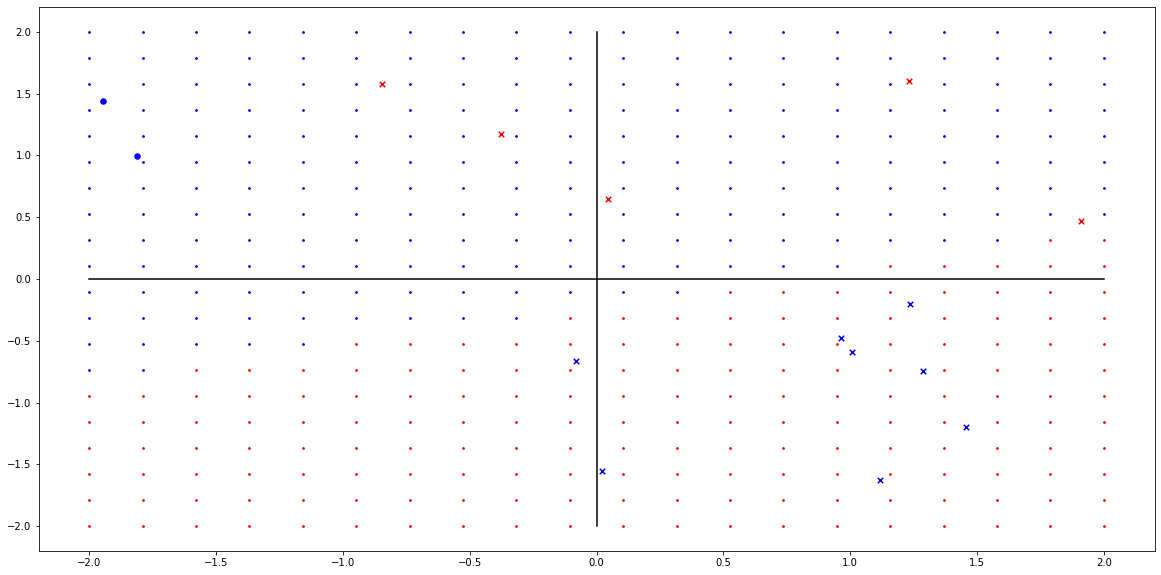

In [77]:

print(w)
print(x)
print(t)
plt.figure(0,figsize=(20,10))
plotDecisionGrid(w)
plotDataResults(w,x,t)
plt.show()



w before: 
 [-0.2058375  -0.28835342  0.93513808]
w after: 
 [-0.57271967 -0.6735806  -0.46720589]


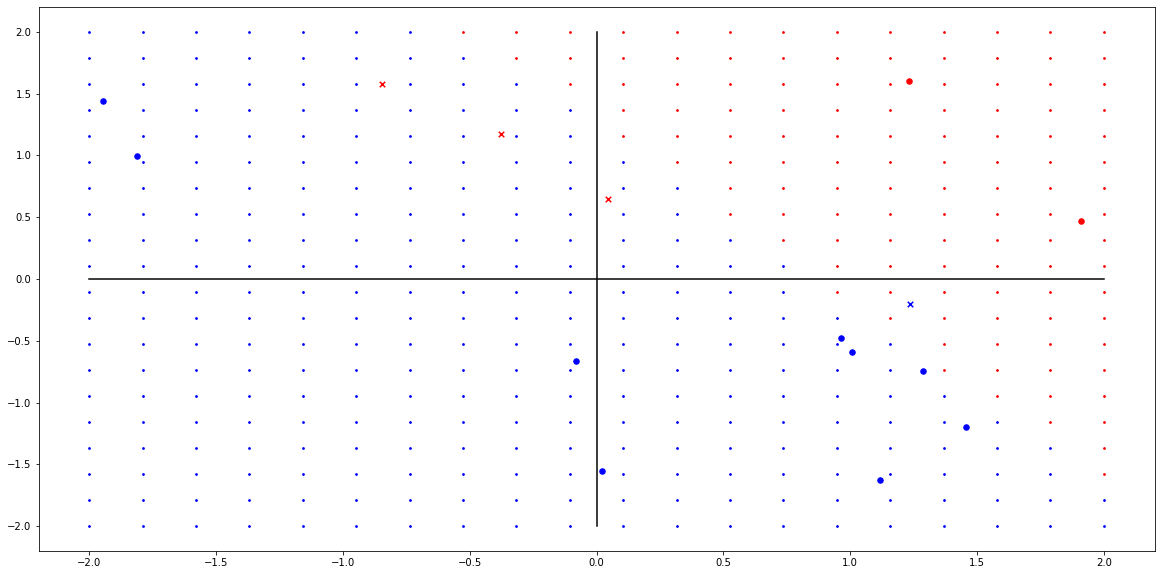

In [78]:
# Do 1 epoch of training and then retest
alpha = 0.1
print('w before: \n',w)
w = fit(w,x,t,alpha)
w = w / np.linalg.norm(w)
print('w after: \n',w)
plt.figure(0,figsize=(20,10))
plotDecisionGrid(w)
plotDataResults(w,x,t)
plt.show()



w before: 
 [-0.57271967 -0.6735806  -0.46720589]
w after: 
 [-0.32864093 -0.5114706  -0.7939729 ]


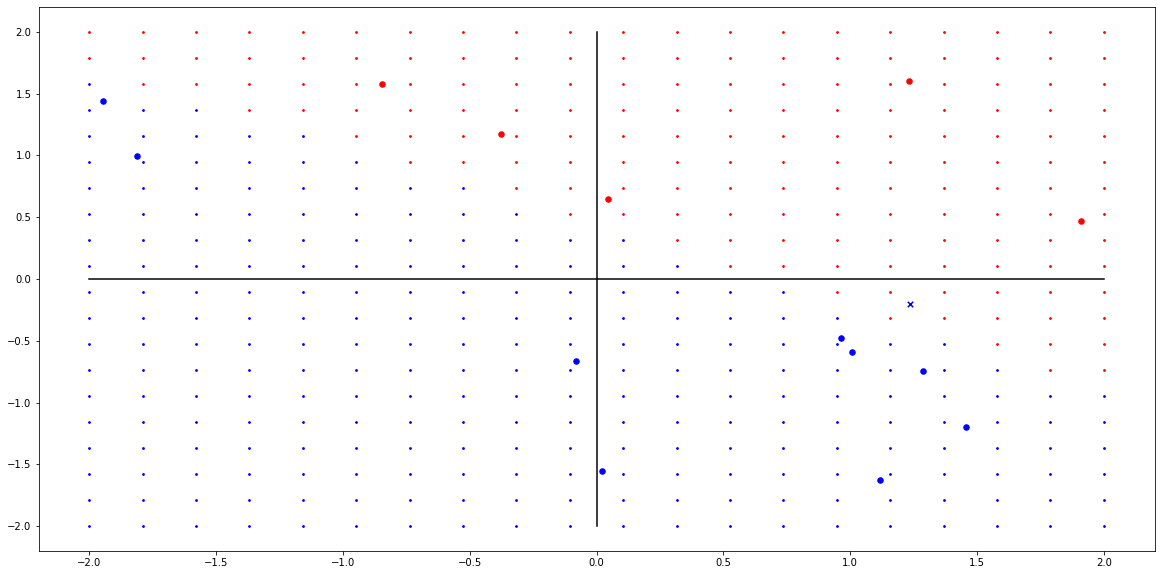

In [79]:
# Do another epoch of training and then retest
alpha = 0.1
print('w before: \n',w)
w = fit(w,x,t,alpha)
w = w / np.linalg.norm(w)
print('w after: \n',w)
plt.figure(0,figsize=(20,10))
plotDecisionGrid(w)
plotDataResults(w,x,t)
plt.show()



w before: 
 [-0.32864093 -0.5114706  -0.7939729 ]
w after: 
 [-0.42925358 -0.3884524  -0.81538095]


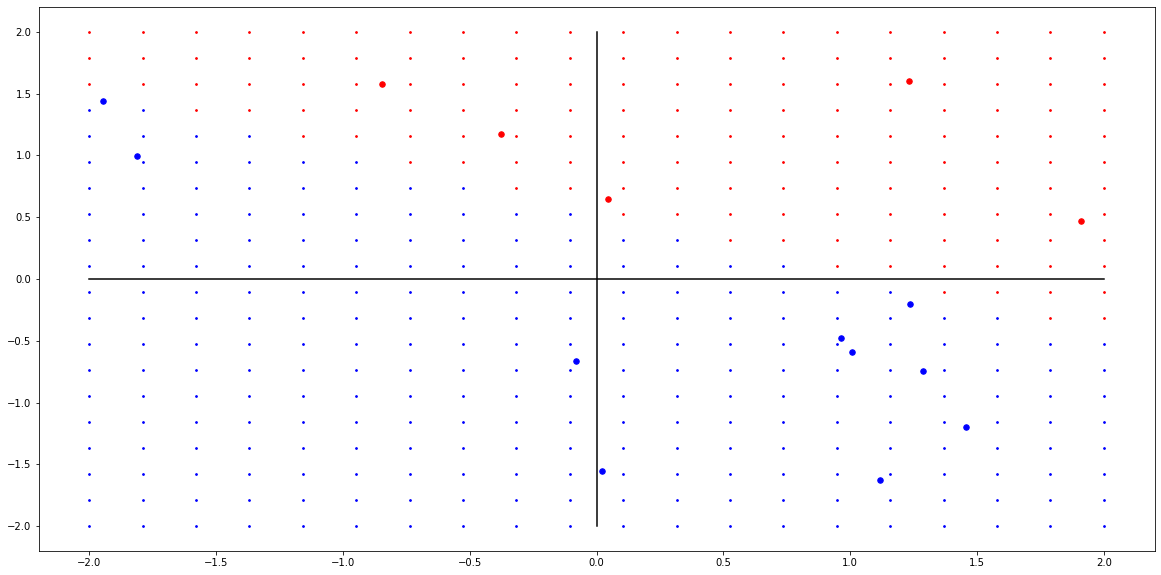

In [80]:
# Do a third epoch of training with lower learning rate and then retest
alpha = 0.05
print('w before: \n',w)
w = fit(w,x,t,alpha)
w = w / np.linalg.norm(w)
print('w after: \n',w)
plt.figure(0,figsize=(20,10))
plotDecisionGrid(w)
plotDataResults(w,x,t)
plt.show()

